## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  47.183114  1086.625580  0.583643   1.803081  635.891368
1  78.280203   165.260107  0.255951   6.407037   89.063594
2  98.564341  1095.843725  0.209624   8.806106  250.081282
3  53.557446   154.576218  0.530436  10.077626   98.134579
4  35.357995   813.035953  0.810969   2.943174  660.381690


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9596405	total: 57.2ms	remaining: 57.2s
1:	learn: 0.9481878	total: 57.7ms	remaining: 28.8s
2:	learn: 0.9375531	total: 58.1ms	remaining: 19.3s
3:	learn: 0.9263378	total: 58.7ms	remaining: 14.6s
4:	learn: 0.9134568	total: 59.2ms	remaining: 11.8s
5:	learn: 0.9041635	total: 59.6ms	remaining: 9.88s
6:	learn: 0.8900935	total: 60.1ms	remaining: 8.52s
7:	learn: 0.8789712	total: 60.6ms	remaining: 7.51s
8:	learn: 0.8689716	total: 61.1ms	remaining: 6.73s
9:	learn: 0.8569613	total: 61.8ms	remaining: 6.12s
10:	learn: 0.8455604	total: 62.3ms	remaining: 5.6s
11:	learn: 0.8337765	total: 62.9ms	remaining: 5.18s
12:	learn: 0.8234137	total: 63.4ms	remaining: 4.81s
13:	learn: 0.8125918	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8021348	total: 64.5ms	remaining: 4.23s
15:	learn: 0.7922607	total: 65ms	remaining: 4s
16:	learn: 0.7847117	total: 65.5ms	remaining: 3.78s
17:	learn: 0.7750714	total: 66ms	remaining: 3.6s
18:	learn: 0.7670859	total: 66.4ms	remaining: 3.43s
19

110:	learn: 0.2828324	total: 107ms	remaining: 857ms
111:	learn: 0.2797517	total: 108ms	remaining: 853ms
112:	learn: 0.2774684	total: 108ms	remaining: 848ms
113:	learn: 0.2748729	total: 108ms	remaining: 843ms
114:	learn: 0.2723903	total: 109ms	remaining: 839ms
115:	learn: 0.2698962	total: 109ms	remaining: 834ms
116:	learn: 0.2672128	total: 110ms	remaining: 829ms
117:	learn: 0.2643471	total: 110ms	remaining: 824ms
118:	learn: 0.2625055	total: 111ms	remaining: 820ms
119:	learn: 0.2593492	total: 111ms	remaining: 816ms
120:	learn: 0.2563427	total: 112ms	remaining: 811ms
121:	learn: 0.2533864	total: 112ms	remaining: 806ms
122:	learn: 0.2516111	total: 113ms	remaining: 803ms
123:	learn: 0.2490904	total: 113ms	remaining: 799ms
124:	learn: 0.2471074	total: 114ms	remaining: 795ms
125:	learn: 0.2444407	total: 114ms	remaining: 791ms
126:	learn: 0.2419431	total: 114ms	remaining: 787ms
127:	learn: 0.2395636	total: 115ms	remaining: 783ms
128:	learn: 0.2375918	total: 115ms	remaining: 779ms
129:	learn: 

278:	learn: 0.0728056	total: 185ms	remaining: 479ms
279:	learn: 0.0724097	total: 186ms	remaining: 478ms
280:	learn: 0.0720711	total: 186ms	remaining: 477ms
281:	learn: 0.0714545	total: 187ms	remaining: 475ms
282:	learn: 0.0710173	total: 187ms	remaining: 475ms
283:	learn: 0.0707341	total: 188ms	remaining: 473ms
284:	learn: 0.0703384	total: 188ms	remaining: 472ms
285:	learn: 0.0698595	total: 188ms	remaining: 471ms
286:	learn: 0.0695040	total: 189ms	remaining: 469ms
287:	learn: 0.0690908	total: 189ms	remaining: 468ms
288:	learn: 0.0686891	total: 190ms	remaining: 467ms
289:	learn: 0.0682744	total: 190ms	remaining: 466ms
290:	learn: 0.0678886	total: 191ms	remaining: 464ms
291:	learn: 0.0676173	total: 191ms	remaining: 463ms
292:	learn: 0.0673386	total: 192ms	remaining: 462ms
293:	learn: 0.0669526	total: 192ms	remaining: 461ms
294:	learn: 0.0665675	total: 192ms	remaining: 460ms
295:	learn: 0.0661650	total: 193ms	remaining: 459ms
296:	learn: 0.0658387	total: 193ms	remaining: 457ms
297:	learn: 

507:	learn: 0.0297382	total: 289ms	remaining: 280ms
508:	learn: 0.0297177	total: 290ms	remaining: 279ms
509:	learn: 0.0295992	total: 290ms	remaining: 279ms
510:	learn: 0.0295730	total: 291ms	remaining: 278ms
511:	learn: 0.0294590	total: 291ms	remaining: 277ms
512:	learn: 0.0294070	total: 291ms	remaining: 277ms
513:	learn: 0.0292919	total: 292ms	remaining: 276ms
514:	learn: 0.0292412	total: 292ms	remaining: 275ms
515:	learn: 0.0292220	total: 293ms	remaining: 274ms
516:	learn: 0.0291110	total: 293ms	remaining: 274ms
517:	learn: 0.0290922	total: 293ms	remaining: 273ms
518:	learn: 0.0289843	total: 294ms	remaining: 272ms
519:	learn: 0.0289618	total: 294ms	remaining: 272ms
520:	learn: 0.0289438	total: 295ms	remaining: 271ms
521:	learn: 0.0289219	total: 295ms	remaining: 270ms
522:	learn: 0.0288167	total: 296ms	remaining: 270ms
523:	learn: 0.0287686	total: 296ms	remaining: 269ms
524:	learn: 0.0287533	total: 297ms	remaining: 268ms
525:	learn: 0.0286458	total: 297ms	remaining: 268ms
526:	learn: 

682:	learn: 0.0177004	total: 367ms	remaining: 171ms
683:	learn: 0.0176649	total: 368ms	remaining: 170ms
684:	learn: 0.0176299	total: 368ms	remaining: 169ms
685:	learn: 0.0175246	total: 369ms	remaining: 169ms
686:	learn: 0.0174822	total: 369ms	remaining: 168ms
687:	learn: 0.0174189	total: 370ms	remaining: 168ms
688:	learn: 0.0173418	total: 370ms	remaining: 167ms
689:	learn: 0.0172797	total: 371ms	remaining: 167ms
690:	learn: 0.0171791	total: 371ms	remaining: 166ms
691:	learn: 0.0171419	total: 372ms	remaining: 165ms
692:	learn: 0.0171058	total: 372ms	remaining: 165ms
693:	learn: 0.0170794	total: 372ms	remaining: 164ms
694:	learn: 0.0170535	total: 373ms	remaining: 164ms
695:	learn: 0.0170066	total: 373ms	remaining: 163ms
696:	learn: 0.0169606	total: 374ms	remaining: 163ms
697:	learn: 0.0168846	total: 374ms	remaining: 162ms
698:	learn: 0.0168076	total: 375ms	remaining: 161ms
699:	learn: 0.0167742	total: 375ms	remaining: 161ms
700:	learn: 0.0167170	total: 376ms	remaining: 160ms
701:	learn: 

909:	learn: 0.0082612	total: 472ms	remaining: 46.7ms
910:	learn: 0.0082316	total: 472ms	remaining: 46.2ms
911:	learn: 0.0081916	total: 473ms	remaining: 45.6ms
912:	learn: 0.0081626	total: 473ms	remaining: 45.1ms
913:	learn: 0.0081280	total: 474ms	remaining: 44.6ms
914:	learn: 0.0081061	total: 474ms	remaining: 44.1ms
915:	learn: 0.0080643	total: 475ms	remaining: 43.6ms
916:	learn: 0.0080378	total: 476ms	remaining: 43ms
917:	learn: 0.0080164	total: 476ms	remaining: 42.5ms
918:	learn: 0.0079755	total: 477ms	remaining: 42ms
919:	learn: 0.0079418	total: 477ms	remaining: 41.5ms
920:	learn: 0.0079159	total: 477ms	remaining: 41ms
921:	learn: 0.0078760	total: 478ms	remaining: 40.4ms
922:	learn: 0.0078485	total: 478ms	remaining: 39.9ms
923:	learn: 0.0078155	total: 479ms	remaining: 39.4ms
924:	learn: 0.0077829	total: 480ms	remaining: 38.9ms
925:	learn: 0.0077578	total: 480ms	remaining: 38.4ms
926:	learn: 0.0077258	total: 480ms	remaining: 37.8ms
927:	learn: 0.0077012	total: 481ms	remaining: 37.3ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

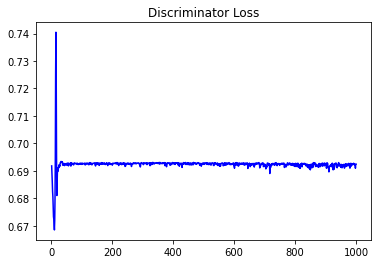

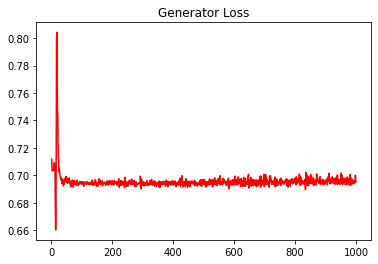

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.00439445747530548


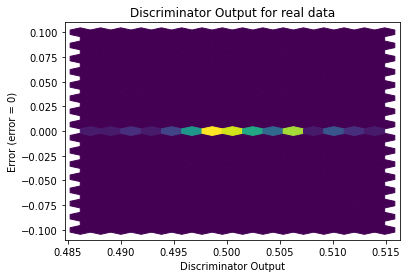

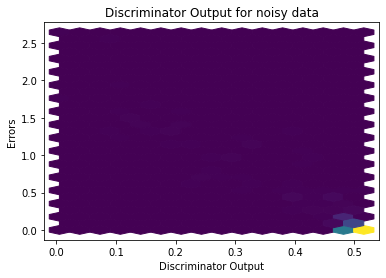

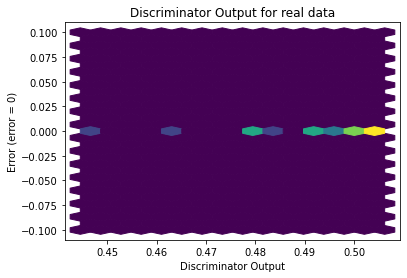

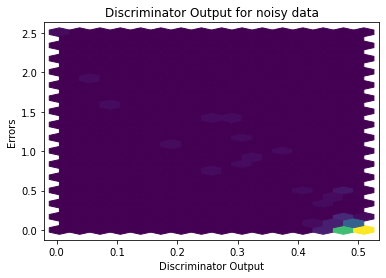

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


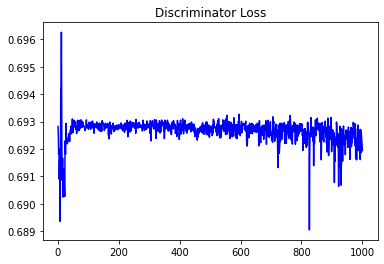

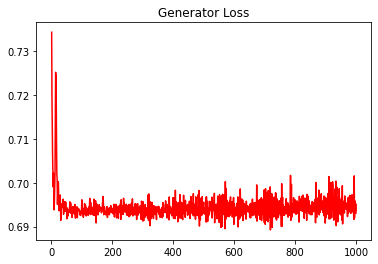

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.003714921107332042


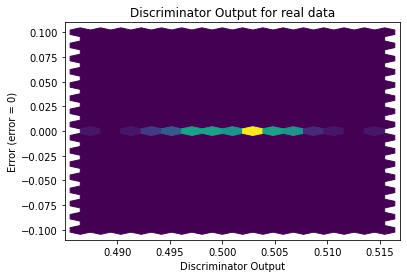

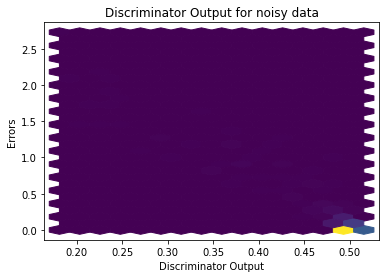

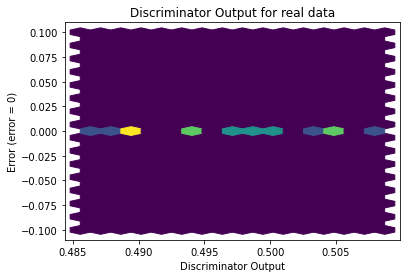

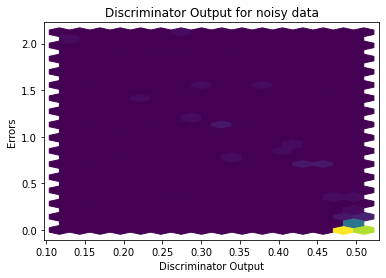

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4745]], requires_grad=True)
